In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df.dropna()
train_df, _ = train_test_split(df, test_size=0.3, random_state=42)
train_df = train_df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
train_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
34,36.4,17.0,195.0,3325.0
26,40.6,18.6,183.0,3550.0
292,48.2,15.6,221.0,5100.0
302,47.4,14.6,212.0,4725.0
61,41.3,21.1,195.0,4400.0


In [37]:
model = KMeans(n_clusters=2)
model.fit(train_df)

KMeans(n_clusters=2)

In [38]:
model.cluster_centers_

array([[  46.84444444,   15.8787037 ,  209.72222222, 4952.77777778],
       [  41.9031746 ,   18.17777778,  191.22222222, 3606.74603175]])

In [6]:
model.inertia_

10707865.162317729

In [12]:
elbow = [['clusterNum','inertia']]
for x in range(1, 16):
    model = KMeans(n_clusters=x)
    model.fit(train_df)
    model.inertia_
    elbow[clusterNum].append(x)
    elbow[inertia].append(model.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


NameError: name 'clusterNum' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


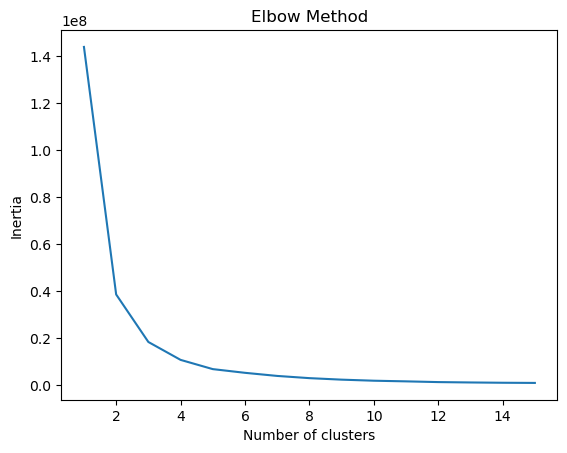

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

elbow = []

# Assuming 'train_df' is your dataset (replace with your actual dataset)
for x in range(1, 16):
    model = KMeans(n_clusters=x)
    model.fit(train_df)  # Fit the model to your dataset
    elbow.append(model.inertia_)  # Append inertia to the list

# Plotting the Elbow graph
plt.plot(range(1, 16), elbow)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [35]:
from sklearn.metrics import silhouette_score
model = KMeans(n_clusters=2)
model.fit(train_df)
silhouette_score(train_df, model.labels_) # 2 is 0.627, 3 is 0.59, 4 is 0.56, 5 is 0.558, 6 is 0.537

0.627693446496695

In [23]:
from sklearn.metrics import silhouette_score
model = KMeans(n_clusters=6)
model.fit(train_df)
silhouette_score(train_df, model.labels_) 

0.5466479519854726

In [32]:
greatestSil = 0
for x in range(2, 10):
    model = KMeans(n_clusters=x)
    model.fit(train_df)
    
    if silhouette_score(train_df, model.labels_) > greatestSil:
        greatestSil = silhouette_score(train_df, model.labels_)
        bestCluster = x
        
    
    # 3 is 0.59, 4 is 0.56, 5 is 0.558, 6 is 0.537

In [33]:
greatestSil

0.627693446496695

In [34]:
bestCluster

2